# **02-SalePrice Study**

## Objectives

* As Per the first business requirement: *The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.*
    * We will perform Exploratory Data Analysis including correlation study (Pearson & Spearman)
    * Generate some Data Vizualisations as specified in the business requirement

## Inputs

* Housing Dataset: inputs/datasets/raw-heritage-housing/house-price-20211124T154130Z-001/house-price/house_prices_records.csv

## Outputs

* Data Visualisations and code that will be used & displayed later within the Streamlit Dashboard App

---

# Change working directory

* As the notebooks are stored in a subfolder, when running the notebook in the editor, the working directory will need to be adjusted.

The working directory will be changed from its current folder to its parent folder
* access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Project5-PredictiveAnalytics-HeritageHousing/jupyter_notebooks'

The parent of the current directory needs to be made the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


* Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Project5-PredictiveAnalytics-HeritageHousing'

# Section 1 - Load Data

* Load Dataframe containing Housing Prices Records

In [4]:
import pandas as pd
heritage_housing = pd.read_csv('inputs/datasets/raw-heritage-housing/house-price-20211124T154130Z-001/house-price/house_prices_records.csv')
heritage_housing.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Section 2 - Data Exploration

First we will generate a Pandas Profile Report to examine the data, where we will examine aspects such as variable type, distribution, and missing levels.

In [5]:
from ydata_profiling import ProfileReport
heritage_profile = ProfileReport(df=heritage_housing, minimal=True)
heritage_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the report generated we can examine all the different features, inspecting missing data
* For our correlation study we want as little missing data as possible so we will first drop the features that are missing more than 10% of their data

In [6]:
heritage_housing = heritage_housing.drop(columns=['EnclosedPorch', 'GarageFinish', 'LotFrontage', 'WoodDeckSF'])

* Now we will drop the rest of the row containining missing values

In [7]:
heritage_housing = heritage_housing.dropna()
heritage_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1111 non-null   int64  
 1   2ndFlrSF      1111 non-null   float64
 2   BedroomAbvGr  1111 non-null   float64
 3   BsmtExposure  1111 non-null   object 
 4   BsmtFinSF1    1111 non-null   int64  
 5   BsmtFinType1  1111 non-null   object 
 6   BsmtUnfSF     1111 non-null   int64  
 7   GarageArea    1111 non-null   int64  
 8   GarageYrBlt   1111 non-null   float64
 9   GrLivArea     1111 non-null   int64  
 10  KitchenQual   1111 non-null   object 
 11  LotArea       1111 non-null   int64  
 12  MasVnrArea    1111 non-null   float64
 13  OpenPorchSF   1111 non-null   int64  
 14  OverallCond   1111 non-null   int64  
 15  OverallQual   1111 non-null   int64  
 16  TotalBsmtSF   1111 non-null   int64  
 17  YearBuilt     1111 non-null   int64  
 18  YearRemodAdd  1111 non-null 

From our previous notebook on data collection it was observed that their were 1460 records available, and after dropping the missing data we are left with 1111 records to use within our correlation study. It is worth noting that we are not neccesarily dropping the records permanantly and may choose to fill the data instead later in the analysis, but for this instance dropping the data will suffice.

To carry out the correlation study of the variables we will use one hot encoding to convert the 3 features with the object data type (['BsmtExposure', 'BsmtFinType1', 'KitchenQual']) into binary values. 

In [8]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=heritage_housing.columns[heritage_housing.dtypes=='object'].to_list(), drop_last=False)
heritage_ohe = encoder.fit_transform(heritage_housing)
print(heritage_ohe.shape)
heritage_ohe.head(5)

(1111, 33)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,MasVnrArea,...,BsmtFinType1_ALQ,BsmtFinType1_Unf,BsmtFinType1_Rec,BsmtFinType1_None,BsmtFinType1_LwQ,BsmtFinType1_BLQ,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Fa,KitchenQual_Ex
0,856,854.0,3.0,706,150,548,2003.0,1710,8450,196.0,...,0,0,0,0,0,0,1,0,0,0
1,1262,0.0,3.0,978,284,460,1976.0,1262,9600,0.0,...,1,0,0,0,0,0,0,1,0,0
2,920,866.0,3.0,486,434,608,2001.0,1786,11250,162.0,...,0,0,0,0,0,0,1,0,0,0
5,796,566.0,1.0,732,64,480,1993.0,1362,14115,0.0,...,0,0,0,0,0,0,0,1,0,0
6,1694,0.0,3.0,1369,317,636,2004.0,1694,10084,186.0,...,0,0,0,0,0,0,1,0,0,0


Now that the data has been encoded we can use <code>.corr()</code> to assess correlation levels of the data using the <code>pearson</code> and <code>spearman</code> methods.

* We disregard the first value in the series which is the correlation between SalesPrice and itself which of course will be 1, so we can eliminate it from the list using <code>[1:]</code>.
* We then sort the values by considering their absolute value, by setting <code>key=abs</code>

#### Spearman Method

In [9]:
heritage_spearman = heritage_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
heritage_spearman

OverallQual       0.797979
GrLivArea         0.719267
YearBuilt         0.647210
GarageArea        0.613925
GarageYrBlt       0.599462
KitchenQual_TA   -0.593858
YearRemodAdd      0.585968
TotalBsmtSF       0.575491
1stFlrSF          0.546102
KitchenQual_Gd    0.476472
Name: SalePrice, dtype: float64

#### Pearson Method

In [10]:
heritage_pearson = heritage_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
heritage_pearson

OverallQual       0.782902
GrLivArea         0.704830
GarageArea        0.607465
TotalBsmtSF       0.586064
1stFlrSF          0.578728
KitchenQual_TA   -0.524214
KitchenQual_Ex    0.513110
YearRemodAdd      0.508639
YearBuilt         0.506723
GarageYrBlt       0.490480
Name: SalePrice, dtype: float64

Based on the two methods results, we can gather that the highest correlated variables are <code>Overall Quality</code>, <code>Living Area</code>, <code>Year Built</code>, and <code>Garage Area</code> each with a strongly positive correlation with the Target Variable <code>Sale Price</code>.

We can better compare these correlation levels of the variables against our target <code>Sale Price</code> by generating some data vizualisations. We can also use these to attempt to confirm several of our hypotheses, which have been outlined in the README, using Bivariate and Multivariate Analysis

We will begin by focusing on the highest correlated variables examining these each in turn against our target, then also examining some of the variables addressed in our hypothesis, that are less correlated such as <code>Year Remodel Added</code>, and <code>Bedrooms Above Grade</code>. 

---

## Bivariate Analysis 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 1 - Overall Quality

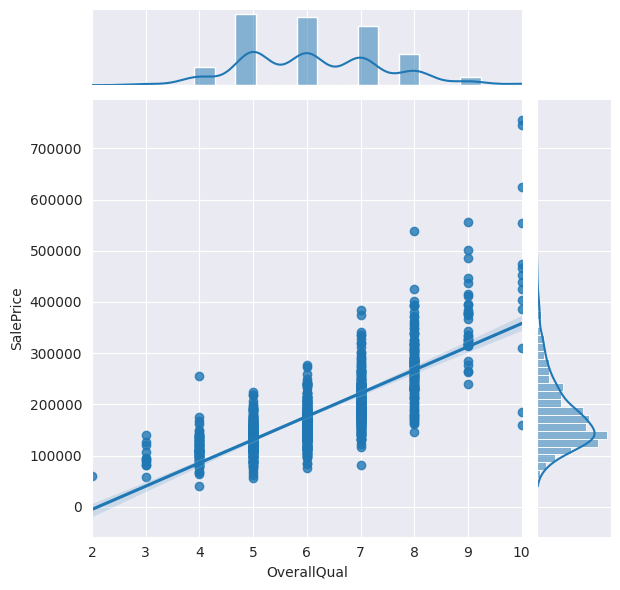

In [12]:
%matplotlib inline
sns.set_style("darkgrid")

sns.jointplot(data=heritage_housing, x='OverallQual', y='SalePrice', kind='reg')
plt.show()

As is more clearly shown in the plot, there is a clear linear trend between <code>OverallQual</code> & <code>SalePrice</code> showing a strong positive correlation between the two.

#### 2- Living Area (Sq Ft)

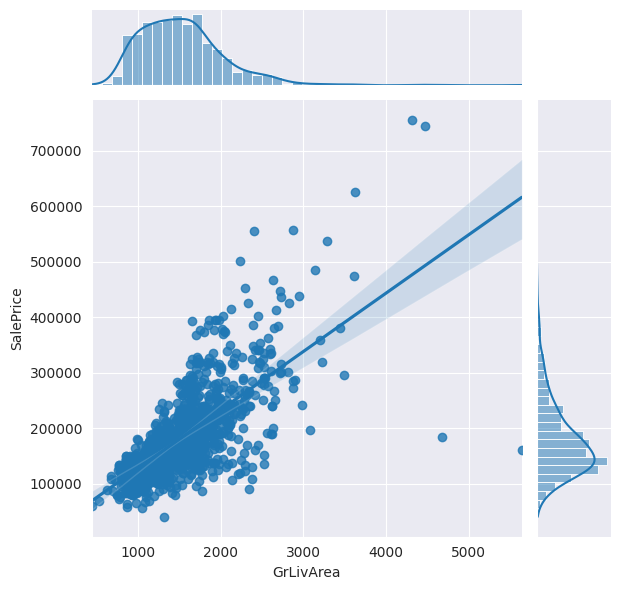

In [13]:
sns.jointplot(data=heritage_housing, x='GrLivArea', y='SalePrice', kind='reg')
plt.show()

While there are a few outliers there is still a strong linear relationship visible similar to the previous plot. This shows that <code>GrLivArea</code> & <code>SalePrice</code> are again showing a strong postive correlation

#### 3 - Year Built

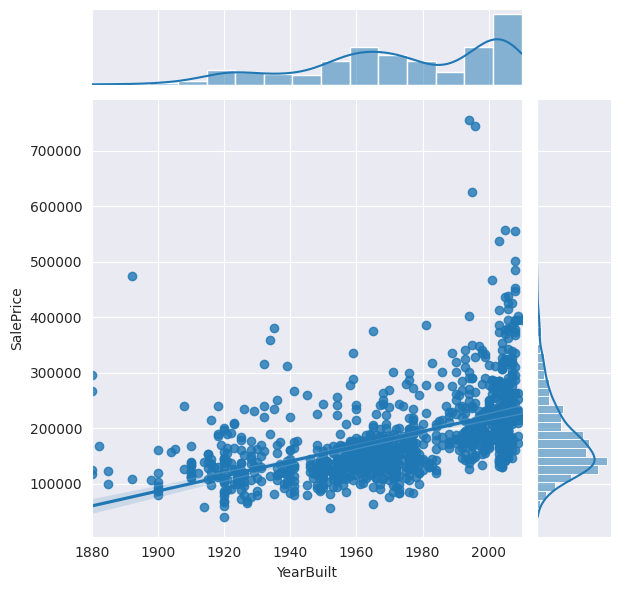

In [14]:
sns.jointplot(data=heritage_housing, x='YearBuilt', y='SalePrice', kind='reg')
plt.show()

This time the plot shows only a moderate correlation between <code>YearBuilt</code> & <code>SalePrice</code> however there is still a clear relationship between those houses more recently built and the sale price. 

#### 4 - Garage Area

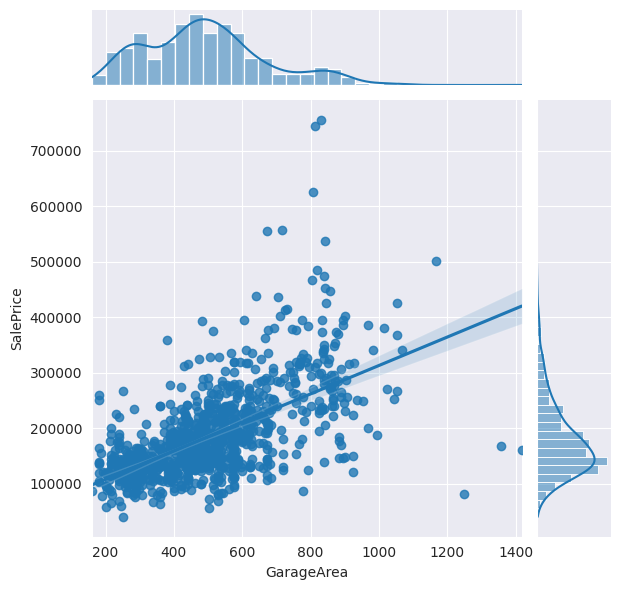

In [15]:
sns.jointplot(data=heritage_housing, x='GarageArea', y='SalePrice', kind='reg')
plt.show()

Once again, despite several outliers, the plot shows the clear positive correlation between <code>GarageArea</code> & <code>SalePrice</code> showing that they have a moderately positive linear relationship

#### Overview & Bivariate Conclusions

* It became clear during the analysis that there are outliers within the data that will have to be dealt with when developing the ML pipeline to improve the accuracy and perfomance when fitting the model. 
* We confirmed visualy that there are strong positive correlations between the variables calcuated by the <code>Pearson</code> & <code>Spearman</code> methods.
* Next we will move onto multivariate analysis and examine several features against Sale Price at once.

---

## Multivariate Analysis 

First we will import the plotly library to generate some more detailed visualizations

In [16]:
import plotly.express as px

### Basement Features

To start we will plot a scatter martrix to examine the different features regarding property basements, this includes the quality of the basement finish, and size of the basement. We will examine how the features correlate against sale price and against each other.

In [29]:
fig = px.scatter_matrix(data_frame=heritage_housing,
                        dimensions=["SalePrice", "TotalBsmtSF", "BsmtUnfSF", "BsmtFinSF1"],
                        color='BsmtFinType1'
                        )
fig.update_layout(
    title='Basement Features',
    height=1000,
    hovermode='closest'
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [26]:
fig = px.scatter_3d(heritage_housing, x='OverallQual', y='SalePrice', z='OverallCond', 
                    color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(
    title = 'Quality & Condition against Sale Price'
)
fig.show()

We can see in the figure displayed while the Overall Condition of the houses seem to have a minor effect on the saleprice it is not nearly as clear as the effect that Overall Quality has on the price. This can be cleared seen by examining some specific data points. We can see on the far left a value with overall quality 9, and overall condition 2 with a sale price around 400k, while on the far right we can see a property with overall quality 3, but an overall condition of 8 only has sale price around the 125k range.

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [20]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block (2852421808.py, line 5)